<font size="8">                                     SENTIMENT</font>

<font size=5> 
          Now we have come to sentiment analysis. Here we have tried to count sentiment scores and to analyze the results. For that we have used NLTK library in Python. Let’s import the necessary Python library (Vader Lexicon) and our unlabeled dataset that we need to add labels for sentiment analysis </font>

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
SpanishArchive = pd.read_csv("C:/Users/xx/Desktop/Spanish papers/editions_with_text.csv")
SpanishArchive = SpanishArchive.dropna()
print(SpanishArchive.head())

   id newspaper   ideology headquarter audience    region format  year  month  \
0   1     ahora  socialist      madrid    adult  national  daily  1931      4   
1   2     ahora  socialist      madrid    adult  national  daily  1932      4   
2   3     ahora  socialist      madrid    adult  national  daily  1932      9   
3   4     ahora  socialist      madrid    adult  national  daily  1935      1   
4   5     ahora  socialist      madrid    adult  national  daily  1935     11   

   day                                               link  \
0    9  https://hemerotecadigital.bne.es/hd/es/viewer?...   
1   15  https://hemerotecadigital.bne.es/hd/es/viewer?...   
2   16  https://hemerotecadigital.bne.es/hd/es/viewer?...   
3    9  https://hemerotecadigital.bne.es/hd/es/viewer?...   
4   15  https://hemerotecadigital.bne.es/hd/es/viewer?...   

                                      newspaper_text  
0  . autómata que hace un par de años al público ...  
1  nota de gran jornada republicana 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\xx\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<font size=5> Now we move to the task of adding labels to the dataset. We start by adding four new columns to this dataset as Positive, Negative, Neutral, and Compound by calculating the sentiment scores of the column "newspaper_text" containing textual data we want to explore </font>

In [8]:
sentiments = SentimentIntensityAnalyzer()
SpanishArchive["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in SpanishArchive["newspaper_text"]]
SpanishArchive["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in SpanishArchive["newspaper_text"]]
SpanishArchive["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in SpanishArchive["newspaper_text"]]
SpanishArchive['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in SpanishArchive["newspaper_text"]]
SpanishArchive.head()

id newspaper   ideology headquarter audience    region format  year  month  \
0   1     ahora  socialist      madrid    adult  national  daily  1931      4   
1   2     ahora  socialist      madrid    adult  national  daily  1932      4   
2   3     ahora  socialist      madrid    adult  national  daily  1932      9   
3   4     ahora  socialist      madrid    adult  national  daily  1935      1   
4   5     ahora  socialist      madrid    adult  national  daily  1935     11   

   day                                               link  \
0    9  https://hemerotecadigital.bne.es/hd/es/viewer?...   
1   15  https://hemerotecadigital.bne.es/hd/es/viewer?...   
2   16  https://hemerotecadigital.bne.es/hd/es/viewer?...   
3    9  https://hemerotecadigital.bne.es/hd/es/viewer?...   
4   15  https://hemerotecadigital.bne.es/hd/es/viewer?...   

                                      newspaper_text  Positive  Negative  \
0  . autómata que hace un par de años al público ...     0.025     0.030   
1  nota de gran jornada republicana del ha la rev...     0.032     0.026   
2  del la banda e de la de la al y republicano do...     0.025     0.030   
3  consecuencia los que últimamente algunas zonas...     0.021     0.027   
4  concentraciones de tropas en y movimiento de a...     0.023     0.032   

   Neutral  Compound Sentiment  
0    0.944   -0.9962  Negative  
1    0.942    0.9978  Positive  
2    0.944   -0.9977  Negative  
3    0.952   -0.9987  Negative  
4    0.945   -0.9998  Negative

<font size=5> As you can see in the above output, we have added four new columns containing the sentiment scores of the Newspaper_text column. Now the next task is to add labels by categorizing these scores. According to the industry standards, if the compound score of sentiment is more than 0.05, then it is categorized as Positive, and if the compound score is less than -0.05, then it is categorized as Negative, otherwise, it’s neutral. So with this information, we will add a new column in this dataset which will include all the sentiment labels. </font>

In [13]:
score = SpanishArchive["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
SpanishArchive["Sentiment"] = sentiment
SpanishArchive

id        newspaper   ideology headquarter audience    region    format  \
0     1            ahora  socialist      madrid    adult  national     daily   
1     2            ahora  socialist      madrid    adult  national     daily   
2     3            ahora  socialist      madrid    adult  national     daily   
3     4            ahora  socialist      madrid    adult  national     daily   
4     5            ahora  socialist      madrid    adult  national     daily   
..  ...              ...        ...         ...      ...       ...       ...   
95   96  vida socialista  socialist      madrid    youth  national  magazine   
96   97  vida socialista  socialist      madrid    youth  national  magazine   
97   98  vida socialista  socialist      madrid    youth  national  magazine   
98   99  vida socialista  socialist      madrid    youth  national  magazine   
99  100  vida socialista  socialist      madrid    youth  national  magazine   

    year  month  day                                               link  \
0   1931      4    9  https://hemerotecadigital.bne.es/hd/es/viewer?...   
1   1932      4   15  https://hemerotecadigital.bne.es/hd/es/viewer?...   
2   1932      9   16  https://hemerotecadigital.bne.es/hd/es/viewer?...   
3   1935      1    9  https://hemerotecadigital.bne.es/hd/es/viewer?...   
4   1935     11   15  https://hemerotecadigital.bne.es/hd/es/viewer?...   
..   ...    ...  ...                                                ...   
95  1910      2   20  https://hemerotecadigital.bne.es/hd/es/viewer?...   
96  1910      7   24  https://hemerotecadigital.bne.es/hd/es/viewer?...   
97  1911     12   17  https://hemerotecadigital.bne.es/hd/es/viewer?...   
98  1911      4   16  https://hemerotecadigital.bne.es/hd/es/viewer?...   
99  1912      7   14  https://hemerotecadigital.bne.es/hd/es/viewer?...   

                                       newspaper_text  Positive  Negative  \
0   . autómata que hace un par de años al público ...     0.025     0.030   
1   nota de gran jornada republicana del ha la rev...     0.032     0.026   
2   del la banda e de la de la al y republicano do...     0.025     0.030   
3   consecuencia los que últimamente algunas zonas...     0.021     0.027   
4   concentraciones de tropas en y movimiento de a...     0.023     0.032   
..                                                ...       ...       ...   
95  de febrero la , ver cuándo salen esos la calle...     0.018     0.046   
96  . 30 , 21 15 15 ó se equivocan los socialistas...     0.018     0.057   
97  , 17 15 15 1 1 como la clase patronal , como s...     0.021     0.047   
98  , 16 15 del de . 15 11 11 el actual en , aunqu...     0.014     0.044   
99  , 14 15 15 gobernante español ha más veces su ...     0.014     0.042   

    Neutral  Compound Sentiment  
0     0.944   -0.9962  Negative  
1     0.942    0.9978  Positive  
2     0.944   -0.9977  Negative  
3     0.952   -0.9987  Negative  
4     0.945   -0.9998  Negative  
..      ...       ...       ...  
95    0.936   -0.9995  Negative  
96    0.926   -0.9998  Negative  
97    0.932   -0.9996  Negative  
98    0.943   -0.9996  Negative  
99    0.944   -0.9996  Negative  

[100 rows x 17 columns]

<font size=5> Now let’s have a look at the frequencies of all the labels </font>

In [14]:
print(SpanishArchive["Sentiment"].value_counts())

Negative    94
Positive     6
Name: Sentiment, dtype: int64


<font size=5> It seems that NLTK Library are not as precise in sentiment, as we can see almost all the texts from our media corpra have been labeled negative eventhough not all the political spanish editions tended to criticize and/or concentrate on unpleasant topics. Nevertheless, one might consider Nevertheless, some may find this period of history rather harsh and depressing and see it as an explanation for the sentiment colouring of the language.  </font>
<font size=5> Still we think it might be an issue of additional translation from Spanish into English causing mean bias. Therefore we aim to continue analyzing the texts to determine the development of Spanish written press of abovementioned historical period. <font size=5>


<font size=5> We aim to discover some tendencies of our corpra and first try to use another tools for this. </font>

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
import nltk, random
from glob import glob
nltk.download("punkt")
nltk.download("cess_esp") #Spanish corpus available in NLTK
nltk.download("stopwords")
import math
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\xx\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<font size=5> We create the wordcloud with 1000 most popular words </font>

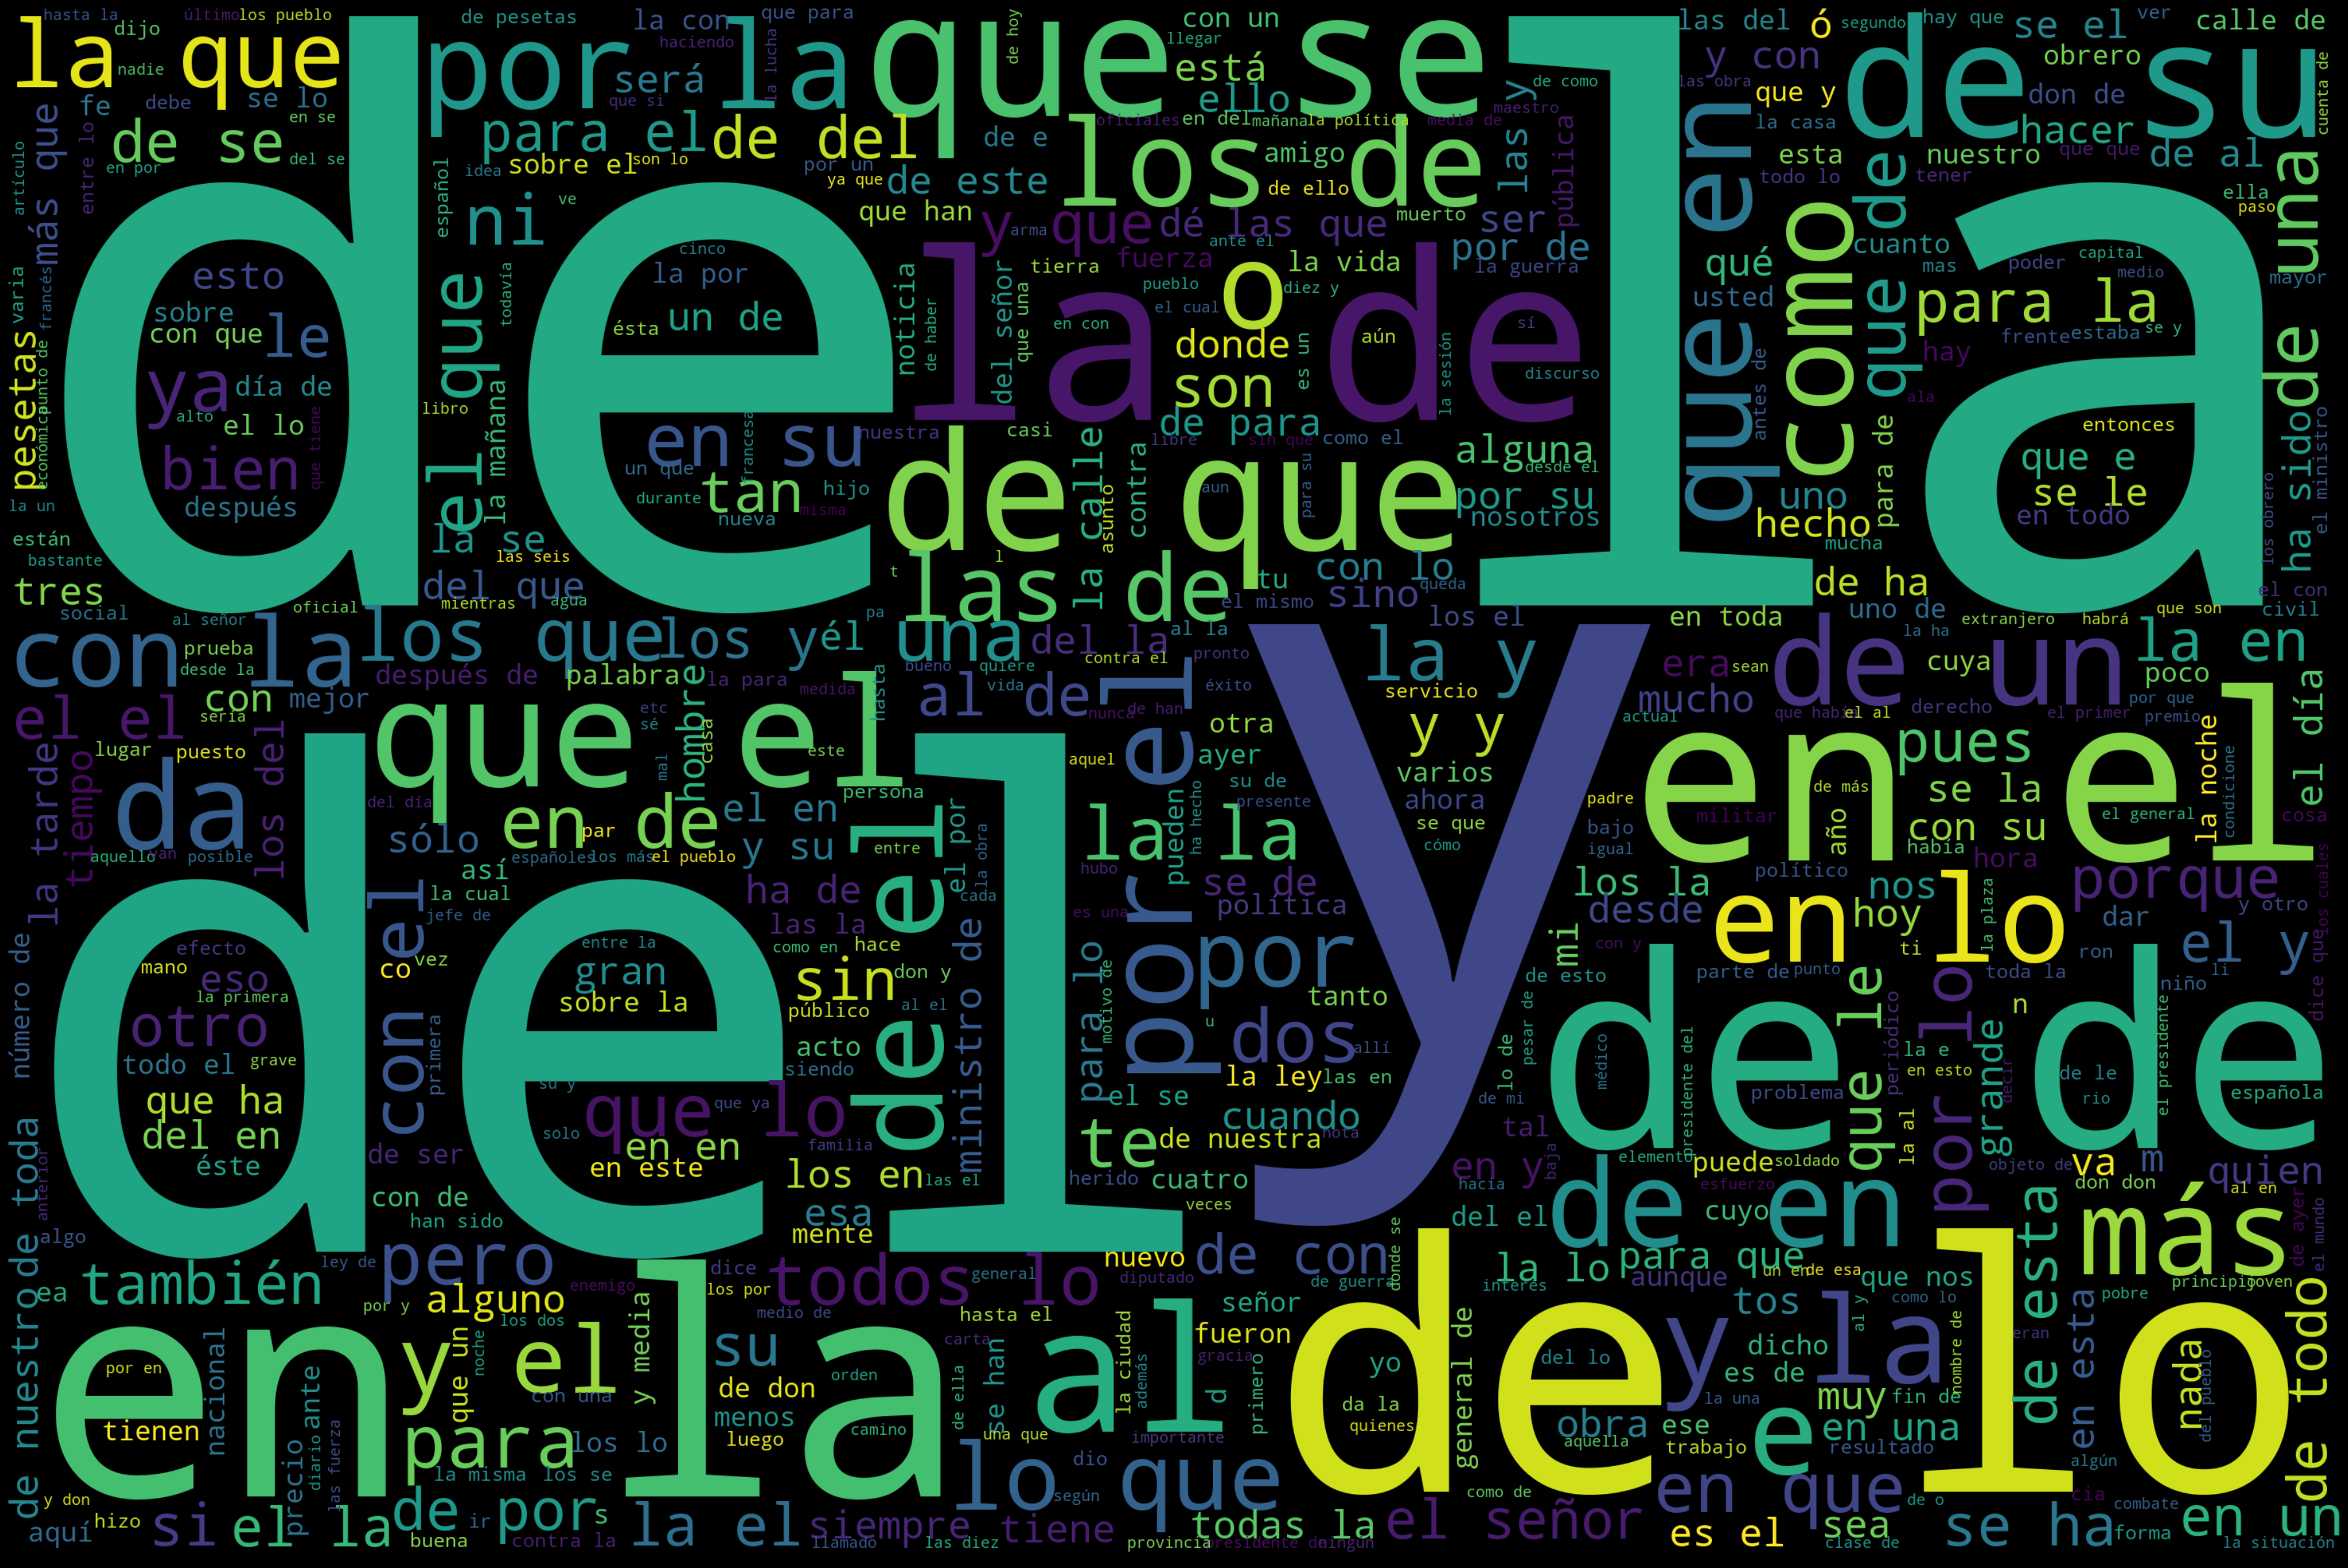

In [30]:
text = df.newspaper_text.values
wordcloud = WordCloud(
    max_words = 1000,
    width = 600,
    height = 400,
       normalize_plurals = True,
    scale = 5,
    relative_scaling = 0,
    background_color = 'black',
    ).generate(str(text))
fig = plt.figure(
    figsize = (50,40),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

<font size=5> Now we take our combined text corpra and create a function to recompose words, which are split into individual letters, removing the spaces. Then we create a corpus with the tokenised text, fix broken words, remove tokens not found in Spanish corpus and eliminate all words that do not exist in the Spanish corpus.
Thus we get the new corpus without duplicates.


In [31]:
words = [] 
with open("C:/Users/xx/Desktop/Spanish papers/editions_with_ text.txt","r") as words_file: 
    for line in words_file:
        words.append(line)
        
        
def retokenize(tokenized_text):
    tokenized_text=SpanishArchive
    tokenized = []
    is_broken_word = False
    temp_word = ""
    for token in tokenized_text:
        if len(token) == 1:
            if not is_broken_word:
                is_broken_word = True
                temp_word = token
            else:
                temp_word += token
        else:
            if is_broken_word:
                tokenized.append(temp_word)
                temp_word = ""
                is_broken_word = False
            tokenized.append(token)
    return tokenized

spanish_corpus = {word.lower() for word in nltk.corpus.cess_esp.words()}

for filename in glob('texts/*.txt'):
    text = read_file(filename)
    tokenized_text = nltk.tokenize.word_tokenize(text)
    tokenized_text = retokenize(tokenized_text)
    clean_texts = [word for word in tokenized_text if word in spanish_corpus]
    with open(f'clean_{filename}', 'w', encoding = 'utf-8') as fp:
        for item in clean_texts:
            fp.write(f'{item} ')
            

<font size=5> Now we can observe the whole corpus.

In [32]:
spanish_corpus

{'domingo',
 'agricultura_y_medio_ambiente',
 'juana',
 'oar',
 'teresa_perales',
 'adjunta',
 'juan_fernández',
 'melancólica',
 'voceros',
 'conflictivas',
 'corrosión',
 'moderna',
 'oxidación',
 '24_de_diciembre_de_1948',
 'heridas',
 'tengamos',
 'año_sesenta_y_uno_después_de_cristo',
 'mamparas',
 'asia',
 'sonriendo',
 'alimentarias',
 'profecía',
 'destinadas',
 '1987',
 'parecerlo',
 'residían',
 'dispositivos',
 'incendiarias',
 'confirmen',
 'bombonas',
 'condicional',
 'lata',
 'tribuna',
 'sacarles',
 'liberalismo',
 'rey_de_españa',
 'depende',
 'en_parte_por',
 'argumentado',
 'a_bordo',
 'destacó',
 'expulsar',
 'midiendo',
 'veracidad',
 'por_fortuna',
 'rollo',
 'pasada',
 'dobladas',
 'ochenta',
 'descollante',
 'firmamento',
 'liga_acb',
 'crecientes',
 'favorecerá',
 'orquestó',
 'ascensión',
 'puzzle',
 'popularidad',
 'ironía',
 'ortodoxo',
 'producto',
 'fp',
 'destacarse',
 'echen',
 'leonel_gancedo',
 'gratamente',
 'precedentes',
 'sindicación',
 'empezaba',


<font size=5> Following that, we measure our corpus while from different angles.Firstly, we count number of words.

In [33]:
words = spanish_corpus
print(f"The total number of words in the text is {len(words)}")

The total number of words in the text is 24497


<font size=5> Then we determine 10 most frequent words.

In [34]:
fdist = FreqDist(words)
fdist.most_common(10)

[('domingo', 1),
 ('agricultura_y_medio_ambiente', 1),
 ('juana', 1),
 ('oar', 1),
 ('teresa_perales', 1),
 ('adjunta', 1),
 ('juan_fernández', 1),
 ('melancólica', 1),
 ('voceros', 1),
 ('conflictivas', 1)]

<font size=5> Count the words without punctuation.

In [37]:
words_no_punc = []
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())

print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 19968


<font size=5> We distinguish the stopwords list.

In [25]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords_list = stopwords.words("spanish")
print(stopwords_list)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xx\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<font size=5> We count words left after removing punctuation and stop words

In [41]:
clean_words = []
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 19754


<font size=5> Now we have word cloud with cleaned corpus.

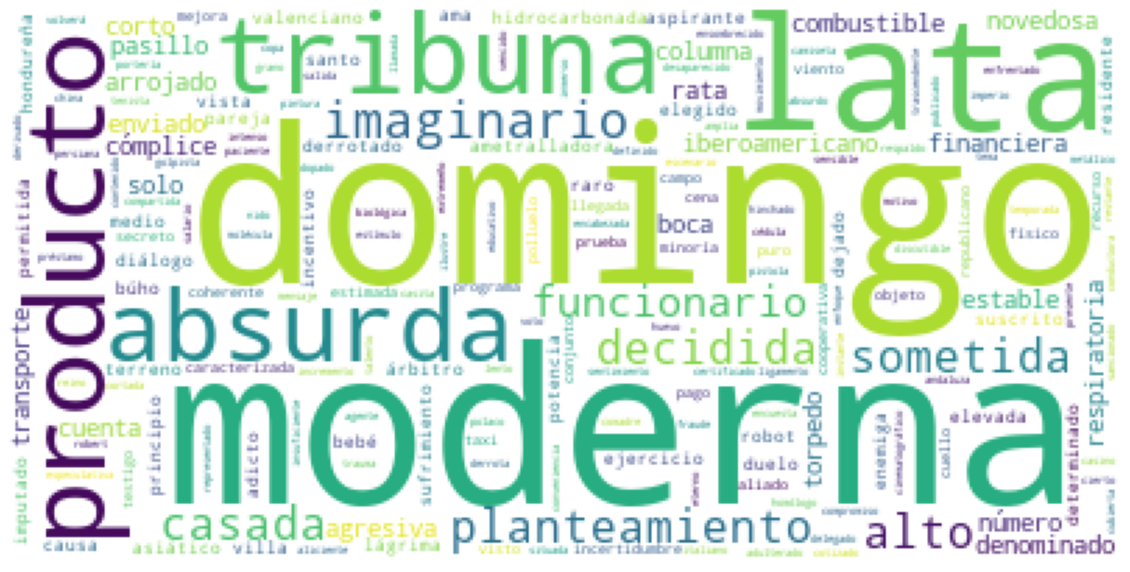

In [42]:
clean_words_string = " ".join(clean_words)
wordcloud = WordCloud(background_color="white").generate(clean_words_string)
plt.figure(figsize = (20, 20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<font size=5>It seems that some of the words in our cloud are quite modern and characteristic of actual media language. We aim to continue our research to find out tendencies in sentiment of our corpus.